In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import env
import wrangle


In [2]:
df = wrangle.get_zillow_data()

In [3]:
df.shape

(52442, 8)

In [4]:
df = wrangle.wrangle_zillow()

In [5]:
df.shape


(51774, 8)

bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips, parcelid 

In [6]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,parcelid
0,4,2.5,2490,691000,1969,7138.64,Orange,14381521
1,4,2.0,1808,241131,1980,3589.81,LA,11108702
2,4,2.0,1878,94598,1965,1415.77,LA,10728687
3,4,2.0,1207,380736,1964,3869.62,Orange,14376191
4,2,1.0,728,33497,1925,974.63,LA,12391744


In [7]:
df.fips.value_counts()

LA         33498
Orange     13940
Ventura     4336
Name: fips, dtype: int64

In [8]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,52432,52433,52434,52435,52436,52437,52438,52439,52440,52441
bedroomcnt,4,4,4,4,2,3,4,4,3,4,...,3,3,2,2,3,3,5,3,3,3
bathroomcnt,2.5,2.0,2.0,2.0,1.0,2.0,3.0,3.0,3.0,2.0,...,2.0,1.0,1.0,1.0,3.5,2.0,4.0,2.0,2.0,2.0
calculatedfinishedsquarefeet,2490,1808,1878,1207,728,1766,1971,2477,3084,1530,...,1461,1528,1440,630,2636,1681,2614,1472,1190,1160
taxvaluedollarcnt,691000,241131,94598,380736,33497,690762,357708,492107,161912,632982,...,160026,663964,41992,260951,496613,263964,1726940,260732,140428,329029
yearbuilt,1969,1980,1965,1964,1925,1947,1979,2003,1962,1965,...,1961,1929,1927,1947,1957,1989,1929,1980,1983,1960
taxamount,7138.64,3589.81,1415.77,3869.62,974.63,7706.6,3699.5,6014.73,2134.49,6353.2,...,2258.38,7233.9,1037.79,3661.29,5650.12,4189.9,20150.27,2657.14,2638.37,4042.14
fips,Orange,LA,LA,Orange,LA,LA,Orange,LA,LA,Orange,...,Orange,LA,LA,LA,Orange,LA,LA,Orange,LA,LA
parcelid,14381521,11108702,10728687,14376191,12391744,12149843,14353512,11095047,11093045,14411036,...,14024246,12059085,12377528,12379394,14147818,11189104,11627263,14476323,11238725,10727329


In [9]:
df.dtypes

bedroomcnt                        int64
bathroomcnt                     float64
calculatedfinishedsquarefeet      int64
taxvaluedollarcnt                 int64
yearbuilt                         int64
taxamount                       float64
fips                             object
parcelid                          int64
dtype: object

In [10]:
df['fips'].replace({6037 : 'LA' , 6059 : 'Orange' , 6111: 'Ventura'}, inplace = True)

In [11]:
df.dtypes

bedroomcnt                        int64
bathroomcnt                     float64
calculatedfinishedsquarefeet      int64
taxvaluedollarcnt                 int64
yearbuilt                         int64
taxamount                       float64
fips                             object
parcelid                          int64
dtype: object

In [12]:
df.fips.value_counts()

LA         33498
Orange     13940
Ventura     4336
Name: fips, dtype: int64

In [13]:
train, validate, test = wrangle.split_zillow_data(df)

In [14]:
cols = ['bedroomcnt' , 'bathroomcnt']

<AxesSubplot:xlabel='bedroomcnt', ylabel='taxvaluedollarcnt'>

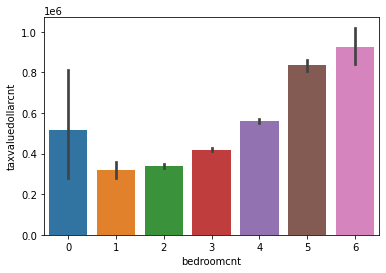

In [15]:
sns.barplot(x ='bedroomcnt', y = 'taxvaluedollarcnt', data = train)

for col in cols:
    sns.lmplot(x = col, y = 'taxvaluedollarcnt' , hue = 'fips', data = train, x_bins = 20)

sns.lmplot(x = 'calculatedfinishedsquarefeet', y = 'taxvaluedollarcnt' , hue = 'fips', data = train, x_bins = 20)

plt.figure(figsize=(8,6))
sns.heatmap(train, cmap='Purples', annot=True, linewidth=0.5, mask= np.triu(train))
plt.ylim(0, 4)

plt.show()

In [16]:
columns = ['bedroomcnt' , 'bathroomcnt', 'calculatedfinishedsquarefeet' , 'taxvaluedollarcnt']

plt.figure(figsize = (8,6))
sns.heatmap(columns, cmap = 'Purple', annot = True, linewidth= .5, mask = np.triu(columns))
plt.ylim(0,4)

plt.show()

In [17]:
columns_corr =train.corr()
columns_corr

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,parcelid
bedroomcnt,1.000000,0.634218,0.624511,0.276703,0.399408,0.280662,0.089940
bathroomcnt,0.634218,1.000000,0.838358,0.536254,0.548135,0.540239,0.079109
calculatedfinishedsquarefeet,0.624511,0.838358,1.000000,0.606801,0.484536,0.606828,0.083931
taxvaluedollarcnt,0.276703,0.536254,0.606801,1.000000,0.226337,0.981945,0.047558
yearbuilt,0.399408,0.548135,0.484536,0.226337,1.000000,0.236187,0.174073
taxamount,0.280662,0.540239,0.606828,0.981945,0.236187,1.000000,0.034328
parcelid,0.089940,0.079109,0.083931,0.047558,0.174073,0.034328,1.000000


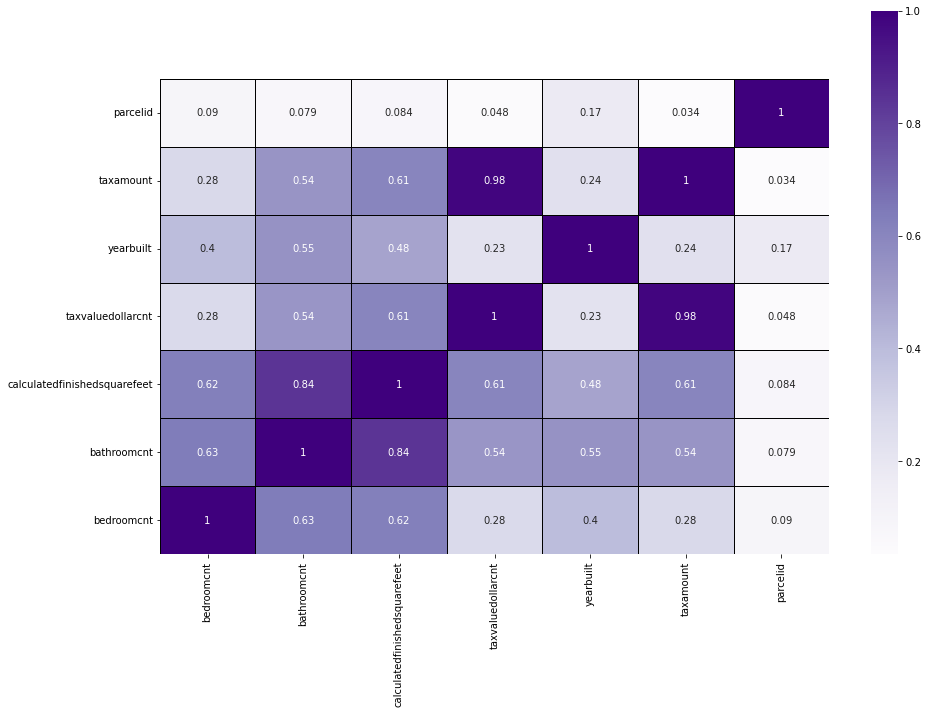

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(columns_corr, cmap='Purples', annot= True, linewidth=0.5,linecolor = 'k')
plt.ylim(0, 8)

plt.show()

<AxesSubplot:xlabel='bedroomcnt', ylabel='taxvaluedollarcnt'>

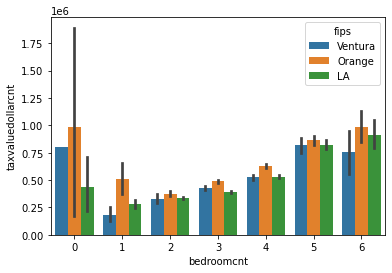

In [19]:
sns.barplot(x ='bedroomcnt', y = 'taxvaluedollarcnt', hue = 'fips', data = train)

<AxesSubplot:xlabel='bathroomcnt', ylabel='taxvaluedollarcnt'>

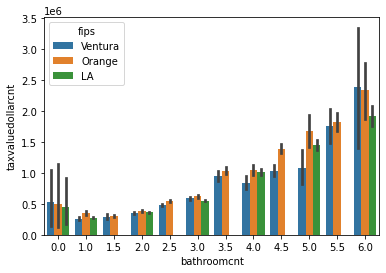

In [20]:
sns.barplot(x ='bathroomcnt', y = 'taxvaluedollarcnt', hue = 'fips', data = train)

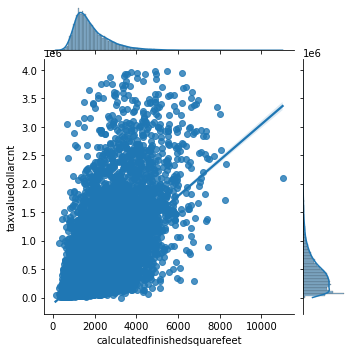

In [21]:
sns.jointplot(x = 'calculatedfinishedsquarefeet' , y = 'taxvaluedollarcnt', data = train, kind = 'reg', height = 5)
plt.show()

## 3 Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [22]:
def plot_variable_pairs():
    for col in columns:
        sns.lmplot(x = col, y = 'taxvaluedollarcnt' , hue = 'fips', data = train, x_bins = 20)

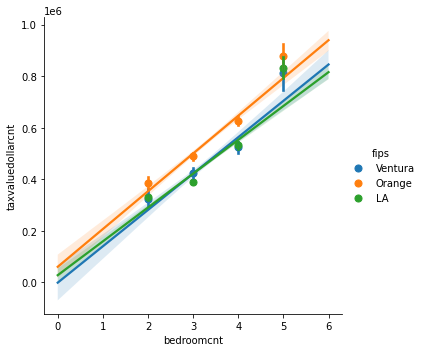

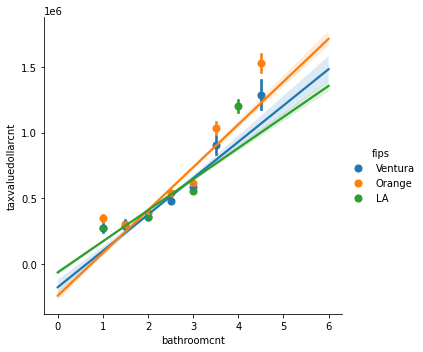

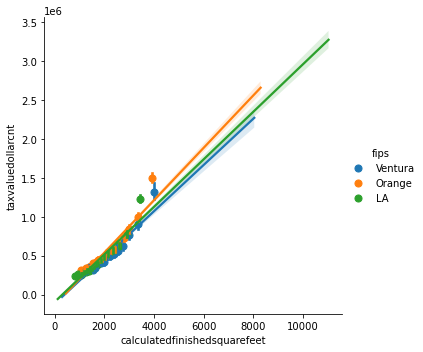

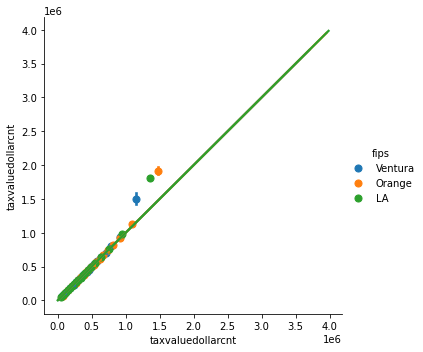

In [23]:
plot_variable_pairs()

In [24]:
train.T

,49236,4333,49183,37753,19937,26279,33179,48966,6381,34959,...,33592,27355,14511,49540,26933,49350,22782,35675,45935,2555
bedroomcnt,3,5,3,4,4,3,3,4,2,4,...,3,5,3,3,3,2,4,3,3,5
bathroomcnt,2.0,3.5,2.0,1.0,2.0,2.0,2.0,3.5,2.0,4.5,...,2.0,4.5,3.0,2.0,1.0,1.0,2.0,3.0,2.5,3.0
calculatedfinishedsquarefeet,1792,4001,1528,1460,1904,1941,1111,3668,1092,3411,...,1298,4002,1870,1613,1285,688,1671,2142,1712,2562
taxvaluedollarcnt,477319,819561,98778,300624,1656855,308476,245276,1478431,327671,1032246,...,152164,980000,224271,244979,765000,631674,79064,257696,504778,595000
yearbuilt,1989,1987,1959,1910,1951,1984,1958,1997,1951,2004,...,1955,2005,1981,1941,1948,1938,1968,1979,2012,2011
taxamount,5236.5,9263.92,1784.34,3743.59,19849.65,3843.08,3082.56,16160.08,4206.26,16238.02,...,2013.8,10965.78,3508.68,3214.01,9305.63,7588.59,1503.34,2918.83,5995.42,11525.16
fips,Ventura,Orange,LA,LA,LA,LA,Orange,Orange,LA,Orange,...,Orange,Ventura,LA,LA,LA,LA,LA,LA,Orange,LA
parcelid,17127903,14065882,12588627,12881206,11646891,11673537,14022722,13981601,12483772,14456570,...,14016540,17231526,11192289,11101251,11461483,11605187,12865698,12049796,13882893,11115944


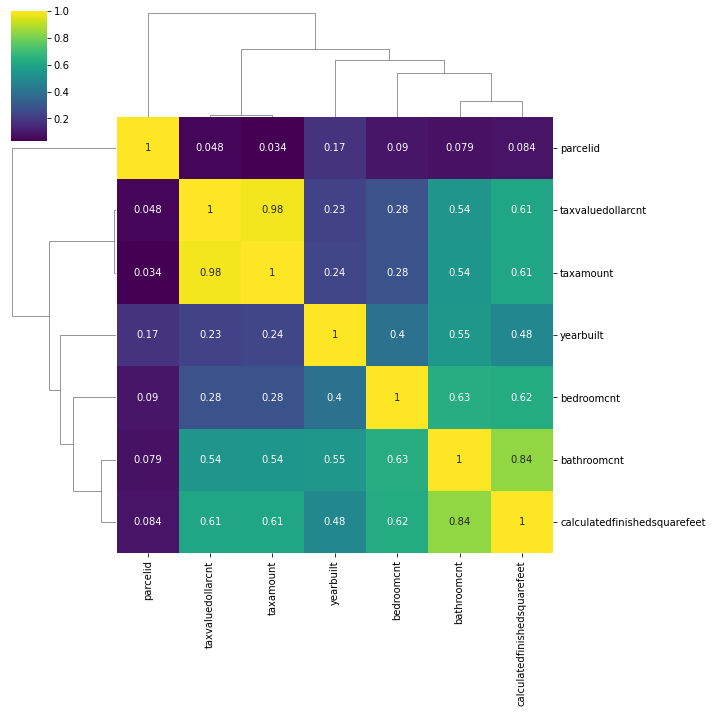

In [25]:
sns.clustermap(columns_corr, annot=True,cmap='viridis')

In [26]:
df.yearbuilt.min()

1878

In [27]:
df.yearbuilt.value_counts()

1955    1894
1950    1602
1954    1512
1953    1482
1956    1380
        ... 
1892       1
1878       1
1882       1
1880       1
1894       1
Name: yearbuilt, Length: 133, dtype: int64

In [28]:
df.bedroomcnt.value_counts()

3    23311
4    15136
2     8317
5     3824
1      602
6      528
0       56
Name: bedroomcnt, dtype: int64

In [29]:
df.bathroomcnt.value_counts()

2.0    21870
3.0    10618
1.0     9551
2.5     3930
4.0     2172
3.5      901
1.5      840
5.0      736
4.5      659
6.0      247
5.5      209
0.0       41
Name: bathroomcnt, dtype: int64

In [30]:
df.loc[df.yearbuilt == 1801]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,parcelid


In [31]:
def plot_categorical_and_continuous_vars(df, continuous, categorical):

    plot_list = []
    for cat in categorical:
        for cont in continuous:
            plot_list.append([cat, cont])
    
    for i in plot_list:
        plt.figure(figsize=(18, 5))
        plt.subplot(131)
        sns.boxplot(x=i[0], y=i[1], data=df)
#         sns.histplot(data = df, x = i[1], hue = 'county', element = 'step', bins =20)
        plt.subplot(132)
        sns.stripplot(x=i[0], y=i[1], data=df)
        plt.subplot(133)
        sns.violinplot(x=i[0], y=i[1], data=df)
#         sns.barplot(x=i[0], y=i[1], data=df)
        plt.show()

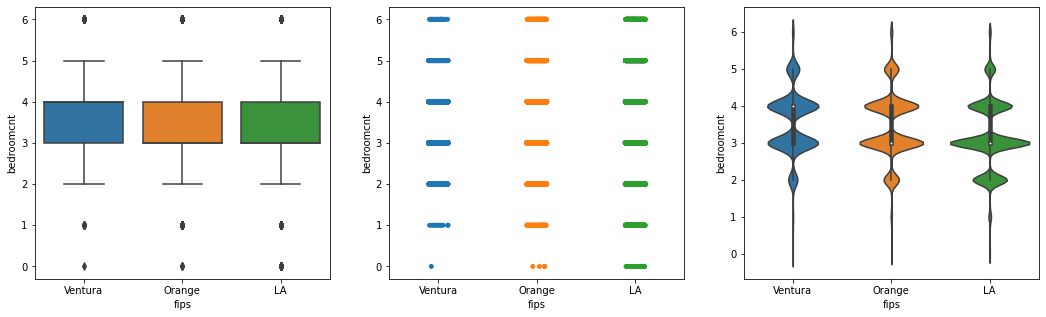

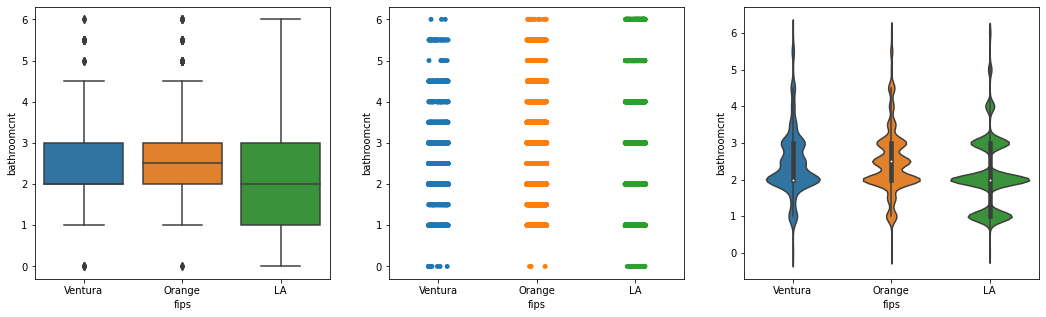

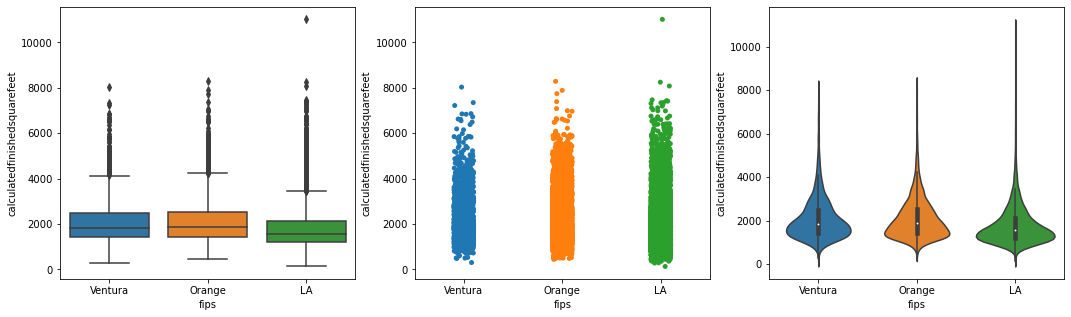

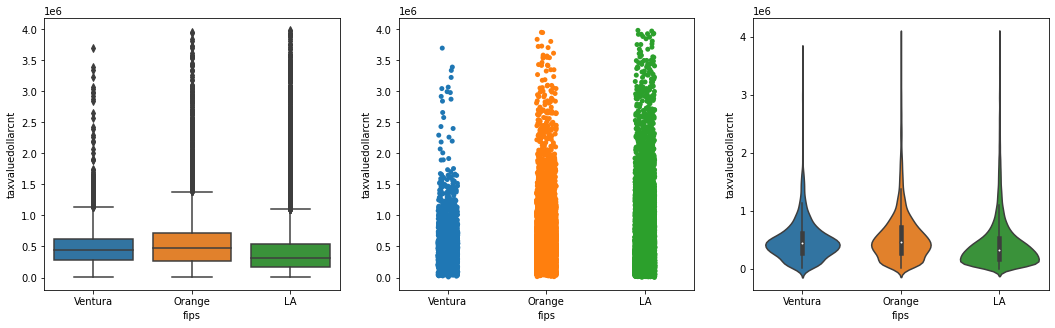

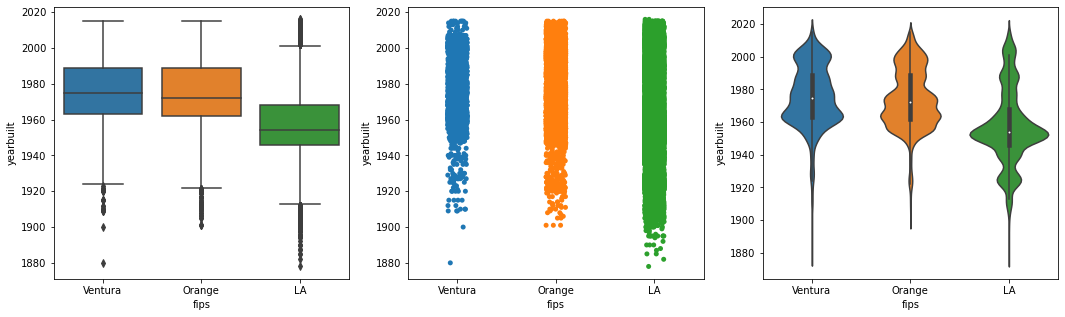

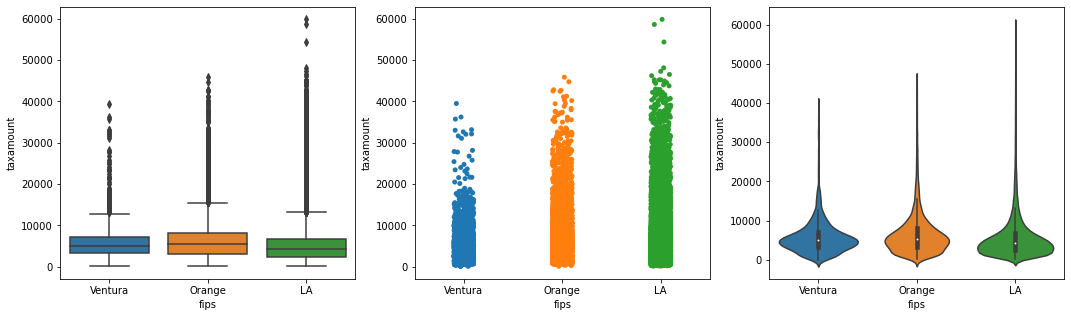

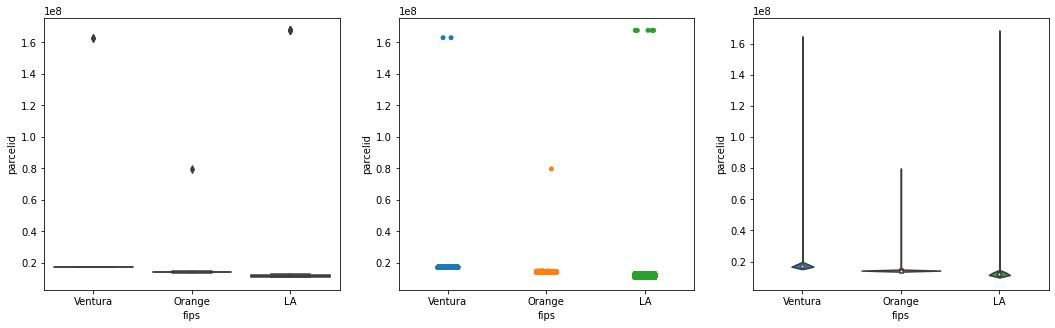

In [32]:
plot_categorical_and_continuous_vars(train, df.select_dtypes(include = 'number').columns,['fips'])

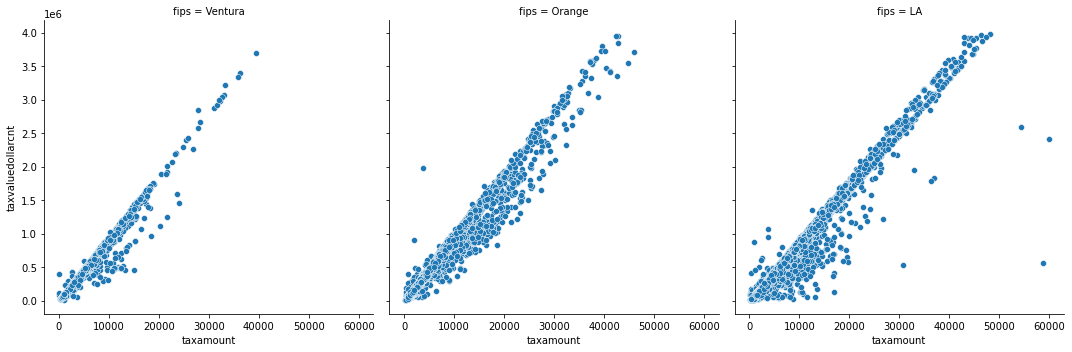

In [33]:
sns.relplot(x="taxamount", y="taxvaluedollarcnt", data=train,  kind='scatter', height=5, col='fips')
plt.show()

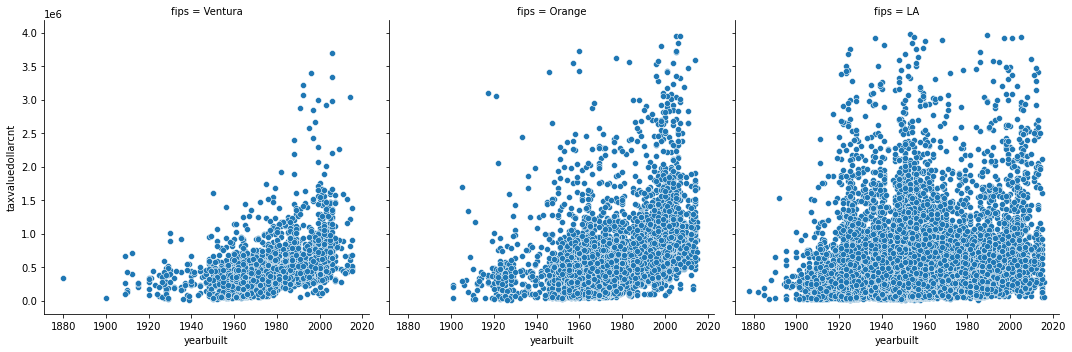

In [34]:
sns.relplot(x="yearbuilt", y="taxvaluedollarcnt", data=train,  kind='scatter', height=5, col='fips')
plt.show()

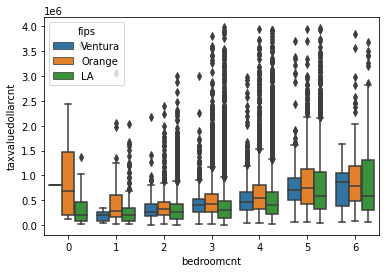

In [35]:
sns.boxplot(x="bedroomcnt", y="taxvaluedollarcnt", data=train, hue='fips')
plt.show()

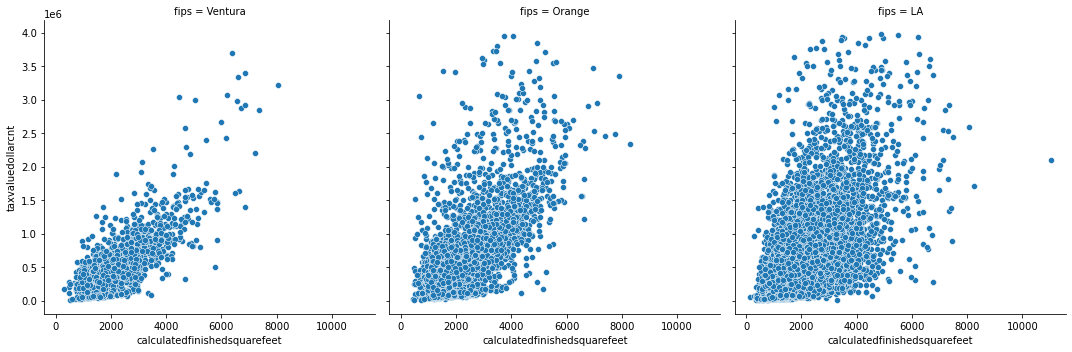

In [36]:
sns.relplot(x="calculatedfinishedsquarefeet", y="taxvaluedollarcnt", data=train,  kind='scatter', height=5, col='fips')
plt.show()

In [37]:

def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df2=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df2

In [38]:
df2=remove_outlier_IQR(df)

In [39]:
df2

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,parcelid
0,4.0,2.5,2490.0,691000.0,1969.0,7138.64,Orange,14381521.0
1,4.0,2.0,1808.0,241131.0,1980.0,3589.81,LA,11108702.0
2,4.0,2.0,1878.0,94598.0,1965.0,1415.77,LA,10728687.0
3,4.0,2.0,1207.0,380736.0,1964.0,3869.62,Orange,14376191.0
4,2.0,1.0,728.0,33497.0,1925.0,974.63,LA,12391744.0
...,...,...,...,...,...,...,...,...
52437,3.0,2.0,1681.0,263964.0,1989.0,4189.90,LA,11189104.0
52438,5.0,4.0,2614.0,NaN,1929.0,NaN,LA,11627263.0
52439,3.0,2.0,1472.0,260732.0,1980.0,2657.14,Orange,14476323.0
52440,3.0,2.0,1190.0,140428.0,1983.0,2638.37,LA,11238725.0


In [40]:
df2.shape

(51774, 8)

In [41]:
df.shape

(51774, 8)

In [42]:
df.loc[df.groupby('fips')['taxvaluedollarcnt'].idxmin()]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,parcelid
39498,3,4.0,3284,1000,1985,816.49,LA,11137835
18245,2,1.0,880,13524,1932,85.94,Orange,14506953
48988,2,1.0,500,9242,1939,1016.38,Ventura,17067445


In [43]:
df.loc[df.groupby('fips')['taxvaluedollarcnt'].idxmax()]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,parcelid
48784,3,6.0,4892,3984381,1953,48135.02,LA,11641837
5144,5,4.5,3731,3952896,2007,42449.94,Orange,13890935
7707,5,5.5,6384,3698000,2006,39496.20,Ventura,17292893


In [44]:
df.loc[df.groupby('bedroomcnt')['taxvaluedollarcnt'].idxmax()]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,parcelid
41223,0,0.0,1728,3640824,1957,42229.17,LA,11687003
13999,1,1.0,670,3055787,1921,32558.32,Orange,14330409
323,2,2.0,1482,3822146,1948,45676.36,LA,11668728
48784,3,6.0,4892,3984381,1953,48135.02,LA,11641837
24889,4,4.5,4167,3952896,2004,42850.54,Orange,14329045
10517,5,6.0,4783,3981978,2013,47785.18,LA,11568321
12776,6,6.0,4941,3839683,2006,42680.98,Orange,14080126


In [53]:
def get_max(df):
    for column in df:
       return df.loc[df.groupby(column)['taxvaluedollarcnt'].idxmax()]
    
    

In [52]:
get_max(df)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,parcelid
41223,0,0.0,1728,3640824,1957,42229.17,LA,11687003
13999,1,1.0,670,3055787,1921,32558.32,Orange,14330409
323,2,2.0,1482,3822146,1948,45676.36,LA,11668728
48784,3,6.0,4892,3984381,1953,48135.02,LA,11641837
24889,4,4.5,4167,3952896,2004,42850.54,Orange,14329045
10517,5,6.0,4783,3981978,2013,47785.18,LA,11568321
12776,6,6.0,4941,3839683,2006,42680.98,Orange,14080126
